In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ObesityDataSet.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


**Step 1: Check the Structure of the Dataset**

● Load the dataset into a suitable data manipulation tool.

● Examine the dataset to understand the types and structure of data you're working with.

● Identify any incorrect or null values within the dataset.

● Decide on a method to handle these missing values, considering the mean of the column as one approach.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df = df.rename(columns={'NObeyesdad': 'obesity_level' , 'FAVC':'high_cal_food' , 'FCVC':'daily_intake_vegs',
                        'NCP':'main_meals_daily', 'CAEC':'food_btw_meals' , 'CH2O':'water_intake_daily' ,
                        'SCC':'calories_monitor' , 'FAF':'physical_activity_daily' , 'TUE':'electronics_usage' ,
                        'CALC':'alcohol_consumption' , 'MTRANS':'transportation_used' })

Renaming these columns tell us more insight what that column is representing.

In [ ]:
df.describe()

,Age,Height,Weight,daily_intake_vegs,main_meals_daily,water_intake_daily,physical_activity_daily,electronics_usage
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.describe(include='object')

,Gender,family_history_with_overweight,high_cal_food,food_btw_meals,SMOKE,calories_monitor,alcohol_consumption,transportation_used,obesity_level
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [ ]:
df.dtypes

,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
high_cal_food,object
daily_intake_vegs,float64
main_meals_daily,float64
food_btw_meals,object
SMOKE,object


As we can see that theres no need for Age, daily_intake_vegs , main_meals_daily,physical_activity_daily , 'water_intake_daily' and electronics_usage columns shouldnt have float64 as their data type. So converting this datatype to int so that we can have better results.


In [ ]:
float_columns = ['Age', 'daily_intake_vegs' , 'main_meals_daily','physical_activity_daily','electronics_usage','water_intake_daily']
df[float_columns] = df[float_columns].round().astype(int)
df

,Gender,Age,Height,Weight,family_history_with_overweight,high_cal_food,daily_intake_vegs,main_meals_daily,food_btw_meals,SMOKE,water_intake_daily,calories_monitor,physical_activity_daily,electronics_usage,alcohol_consumption,transportation_used,obesity_level
0,Female,21,1.620000,64.000000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.710730,131.408528,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.shape

(2111, 17)

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
high_cal_food,0
daily_intake_vegs,0
main_meals_daily,0
food_btw_meals,0
SMOKE,0


In [ ]:
df.duplicated().sum()

27

In [ ]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,high_cal_food,daily_intake_vegs,main_meals_daily,food_btw_meals,SMOKE,water_intake_daily,calories_monitor,physical_activity_daily,electronics_usage,alcohol_consumption,transportation_used,obesity_level
98,Female,21,1.52,42.0,no,no,3,1,Frequently,no,1,no,0,0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25,1.57,55.0,no,yes,2,1,Sometimes,no,2,no,2,0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21,1.62,70.0,no,yes,2,1,no,no,3,no,1,0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21,1.62,70.0,no,yes,2,1,no,no,3,no,1,0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21,1.62,70.0,no,yes,2,1,no,no,3,no,1,0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22,1.69,65.0,yes,yes,2,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Normal_Weight
309,Female,16,1.66,58.0,no,no,2,1,Sometimes,no,1,no,0,1,no,Walking,Normal_Weight
460,Female,18,1.62,55.0,yes,yes,2,3,Frequently,no,1,no,1,1,no,Public_Transportation,Normal_Weight
467,Male,22,1.74,75.0,yes,yes,3,3,Frequently,no,1,no,1,0,no,Automobile,Normal_Weight
496,Male,18,1.72,53.0,yes,yes,2,3,Sometimes,no,2,no,0,2,Sometimes,Public_Transportation,Insufficient_Weight


In [ ]:
df = df.drop_duplicates(keep='first')
df

,Gender,Age,Height,Weight,family_history_with_overweight,high_cal_food,daily_intake_vegs,main_meals_daily,food_btw_meals,SMOKE,water_intake_daily,calories_monitor,physical_activity_daily,electronics_usage,alcohol_consumption,transportation_used,obesity_level
0,Female,21,1.620000,64.000000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.710730,131.408528,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.duplicated().sum()

0

In [ ]:
for columns in df:
    unique = df[columns].unique()
    print(f"Unique value in: {columns} is {unique}")

print(".....................\n")

for columns in df:
    valueCount = df[columns].value_counts()
    print(f"Value Count in: {valueCount}")

Unique value in: Gender is ['Female' 'Male']
Unique value in: Age is [21 23 27 22 29 24 26 41 30 52 20 19 31 39 17 25 55 38 18 15 61 44 34 36
 32 35 40 45 33 51 56 28 16 37 14 42 43 46 48 47]
Unique value in: Height is [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
Unique value in: Weight is [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
Unique value in: family_history_with_overweight is ['yes' 'no']
Unique value in: high_cal_food is ['no' 'yes']
Unique value in: daily_intake_vegs is [2 3 1]
Unique value in: main_meals_daily is [3 1 4 2]
Unique value in: food_btw_meals is ['Sometimes' 'Frequently' 'Always' 'no']
Unique value in: SMOKE is ['no' 'yes']
Unique value in: water_intake_daily is [2 3 1]
Unique value in: calories_monitor is ['no' 'yes']
Unique value in: physical_activity_daily is [0 3 2 1]
Unique value in: electronics_usage is [1 0 2]
Unique value in: alcohol_consumption is ['no' 'Sometimes' 'Frequently' 'Always']
Unique value in: transpor

In [ ]:
df.dtypes

,0
Gender,object
Age,int64
Height,float64
Weight,float64
family_history_with_overweight,object
high_cal_food,object
daily_intake_vegs,int64
main_meals_daily,int64
food_btw_meals,object
SMOKE,object


As we can see now that now datatype has been changed to int64.


**Step 2: Exploratory Data Analysis (EDA)**

● Conduct an exploratory data analysis to uncover trends and insights. Focus on the
following questions:
1. Analyze the distribution of obesity levels within the dataset.
2. Investigate how age might influence obesity levels.
3. Explore the relationship between physical activity frequency and obesity.
4. Examine the impact of different types of food consumption on obesity levels.
5. Assess if there are any observable differences in obesity levels based on gender.

● Choose appropriate visualizations for each of the questions to best represent the data
and insights.

<ipython-input-18-045b45208498>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


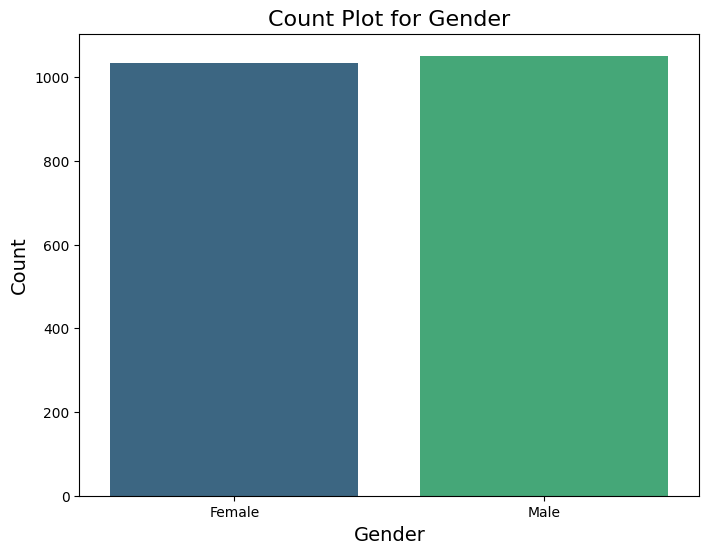

<ipython-input-18-045b45208498>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


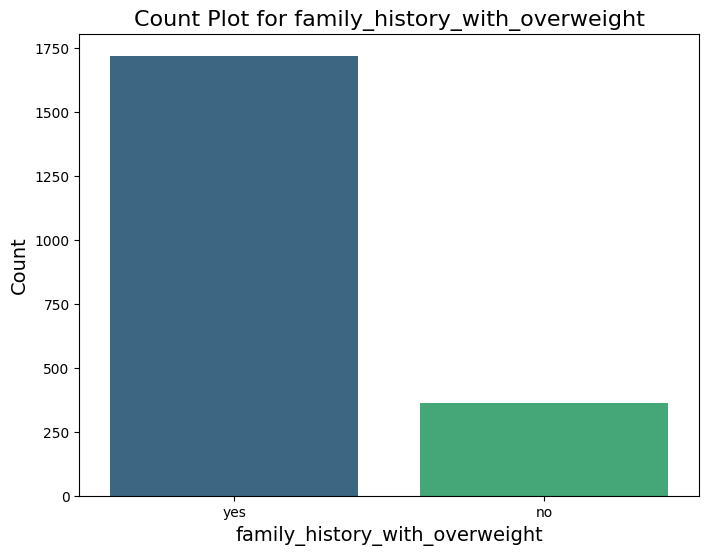

<ipython-input-18-045b45208498>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


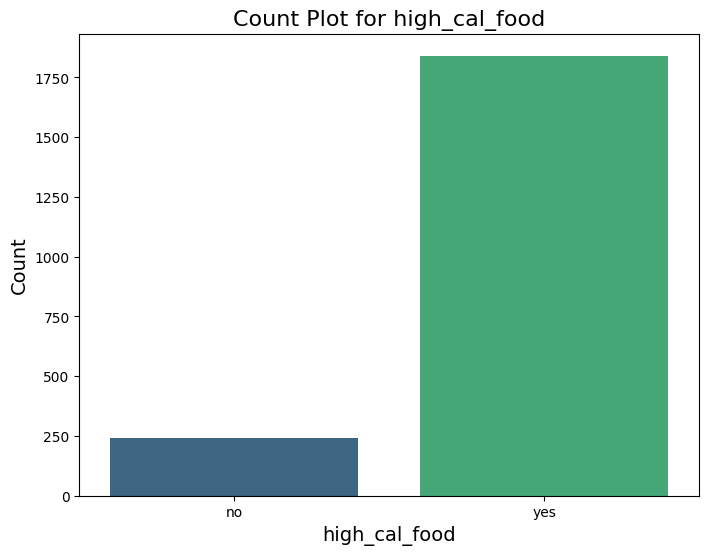

<ipython-input-18-045b45208498>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


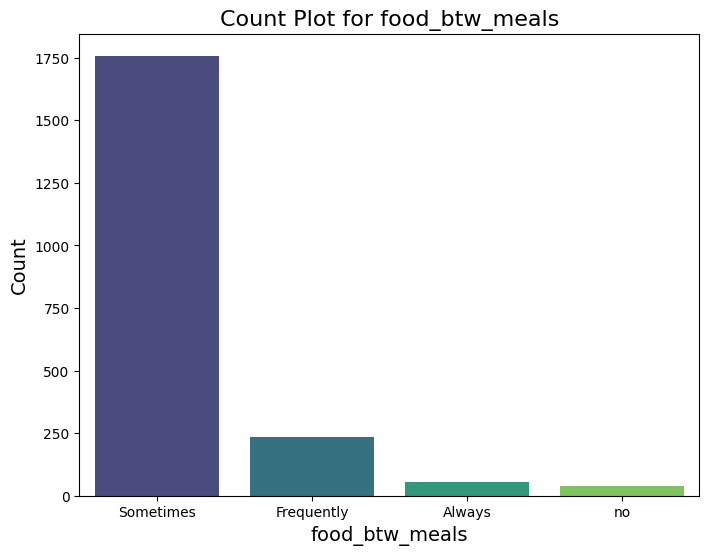

<ipython-input-18-045b45208498>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


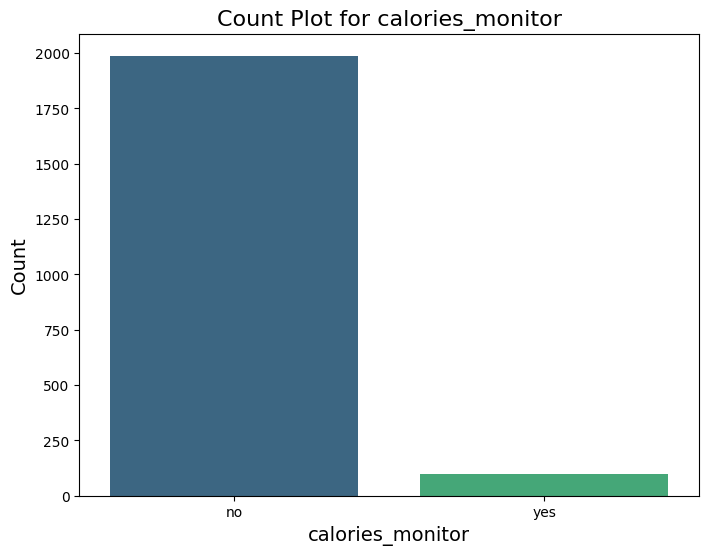

<ipython-input-18-045b45208498>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


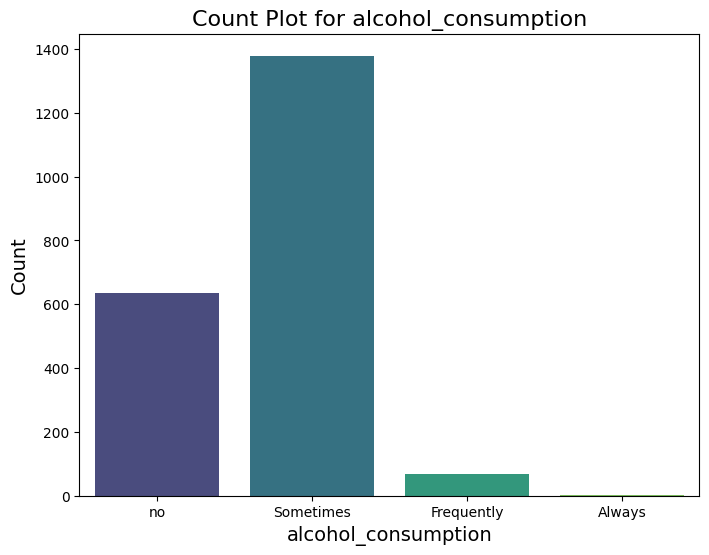

<ipython-input-18-045b45208498>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


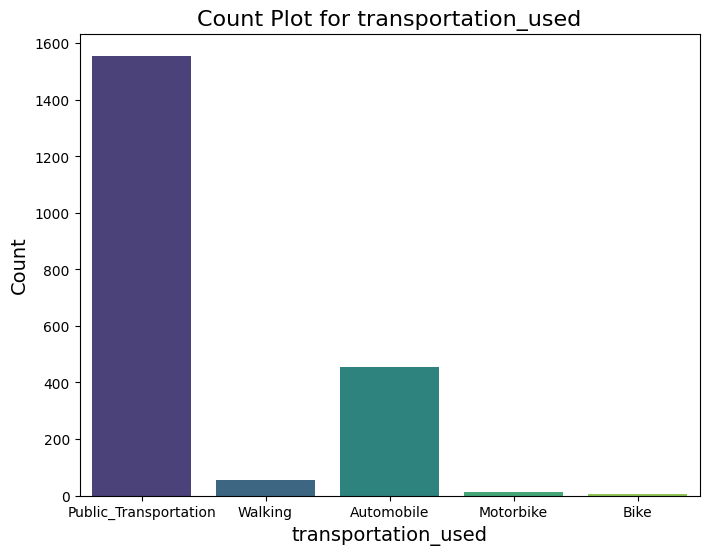

<ipython-input-18-045b45208498>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


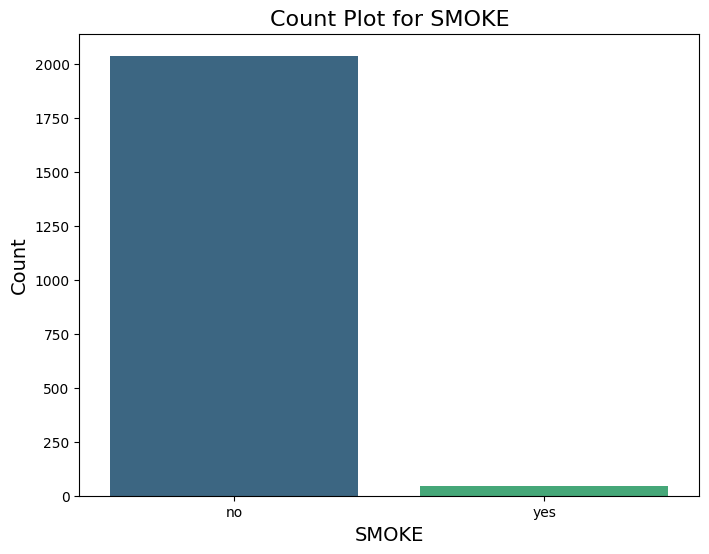

<ipython-input-18-045b45208498>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


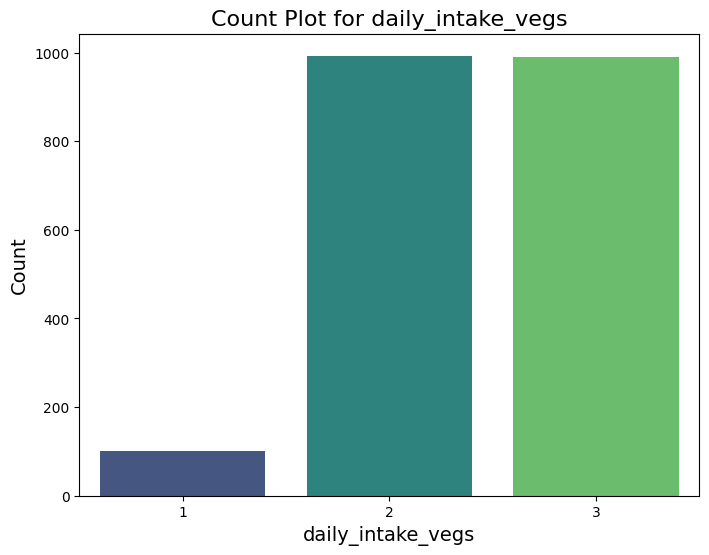

<ipython-input-18-045b45208498>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


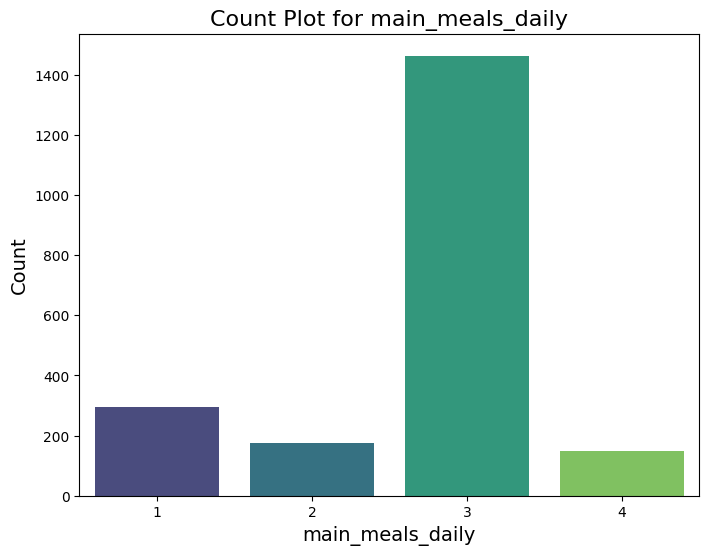

<ipython-input-18-045b45208498>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


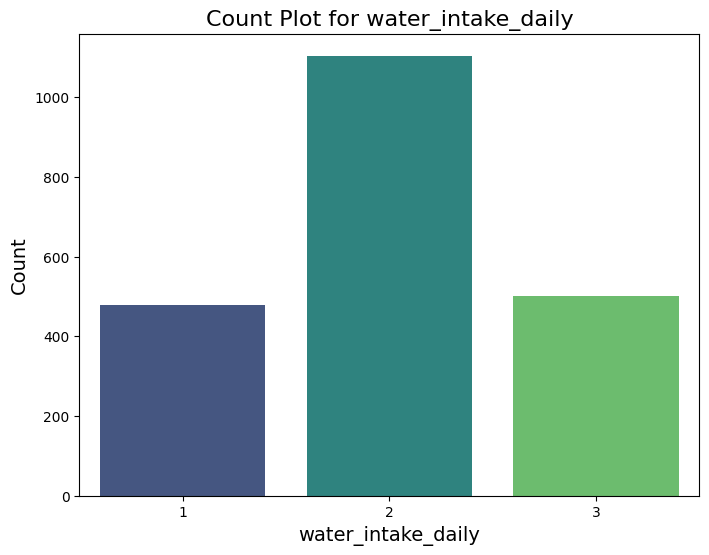

<ipython-input-18-045b45208498>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


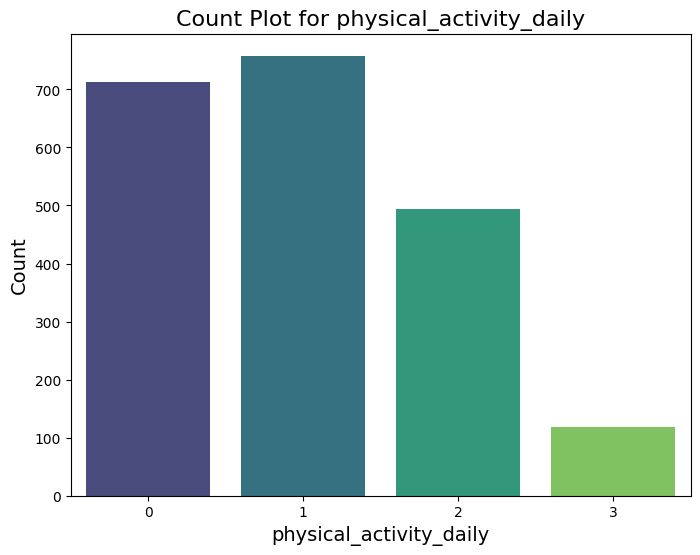

<ipython-input-18-045b45208498>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


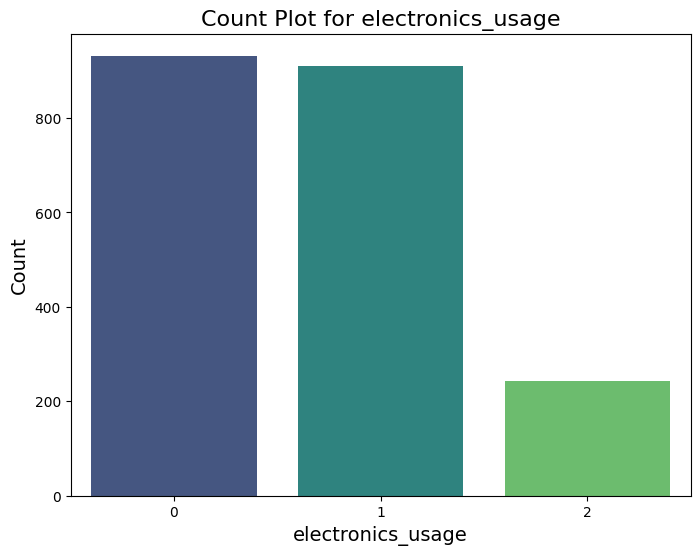

In [ ]:
categorical_columns = ['Gender','family_history_with_overweight','high_cal_food','food_btw_meals','calories_monitor',
                       'alcohol_consumption','transportation_used','SMOKE','daily_intake_vegs',
                       'main_meals_daily','water_intake_daily','physical_activity_daily','electronics_usage']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Count Plot for {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()
    print("\n")


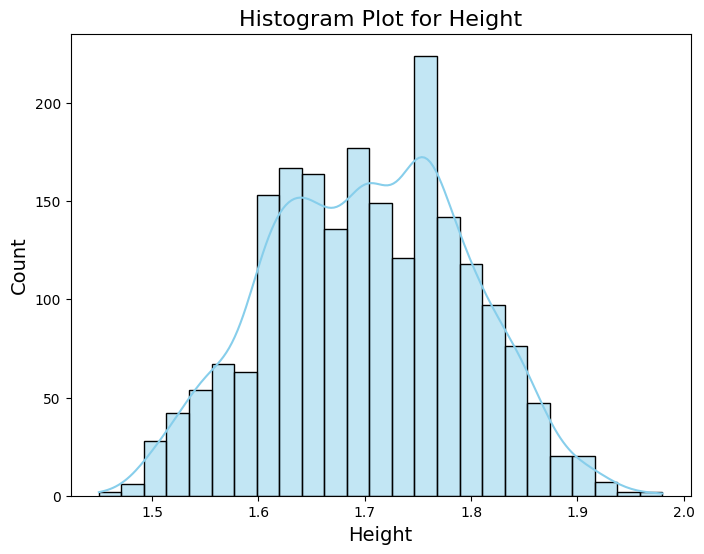

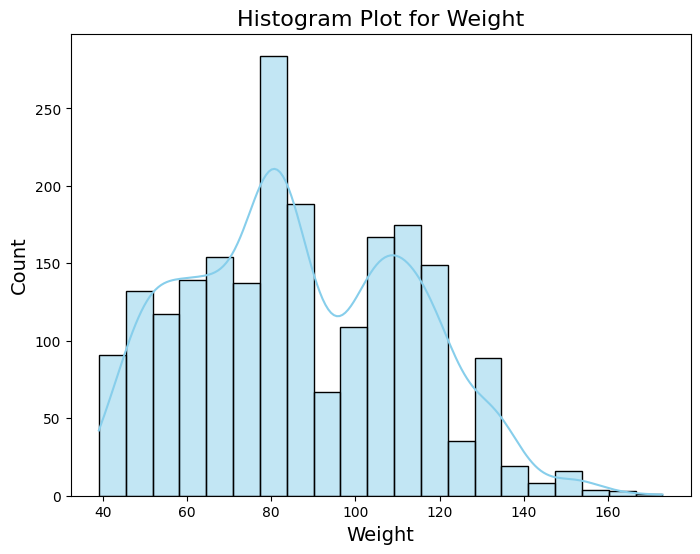

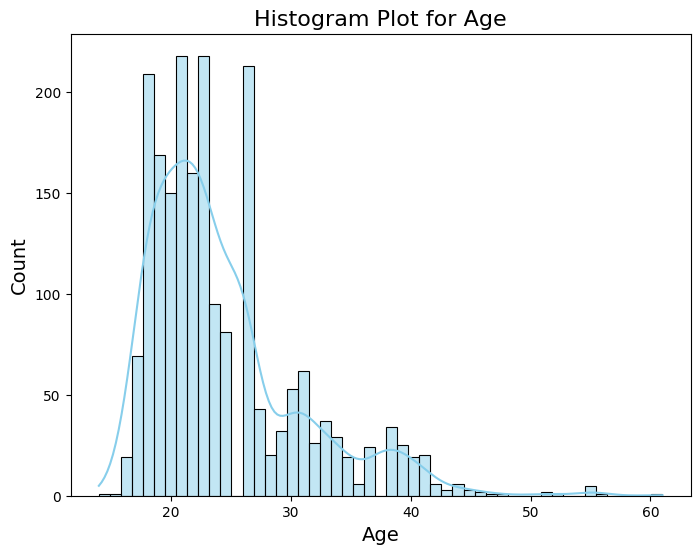

In [ ]:
numerical_columns = ['Height','Weight','Age']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True, color='skyblue')
    plt.title(f'Histogram Plot for {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()
    print("\n")

<ipython-input-20-c4e2f29c3bbd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='obesity_level', palette='viridis')


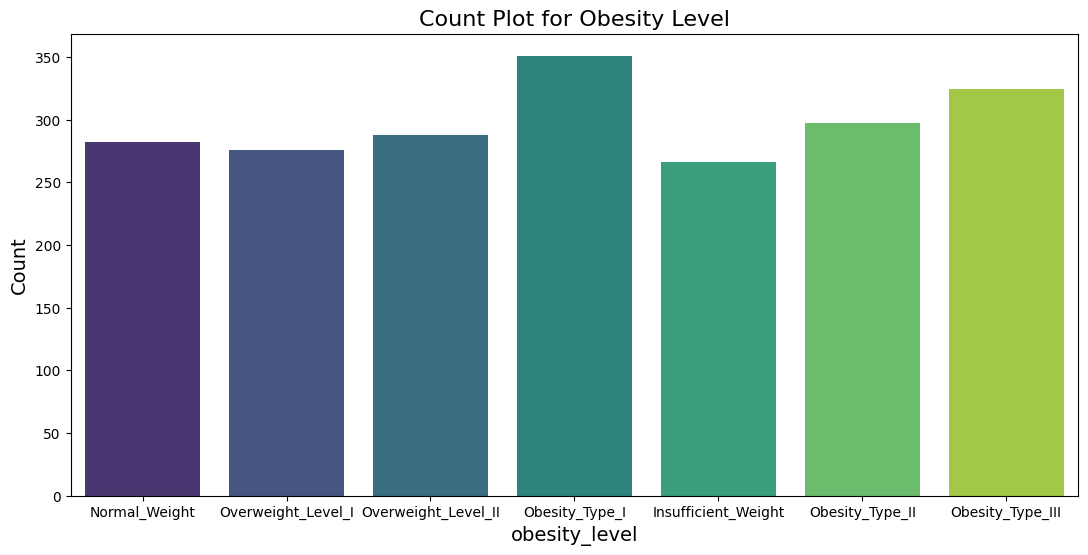

In [ ]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='obesity_level', palette='viridis')
plt.title(f'Count Plot for Obesity Level', fontsize=16)
plt.xlabel('obesity_level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [ ]:
df['obesity_level'].value_counts()

,count
obesity_level,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_II,288
Normal_Weight,282
Overweight_Level_I,276
Insufficient_Weight,266


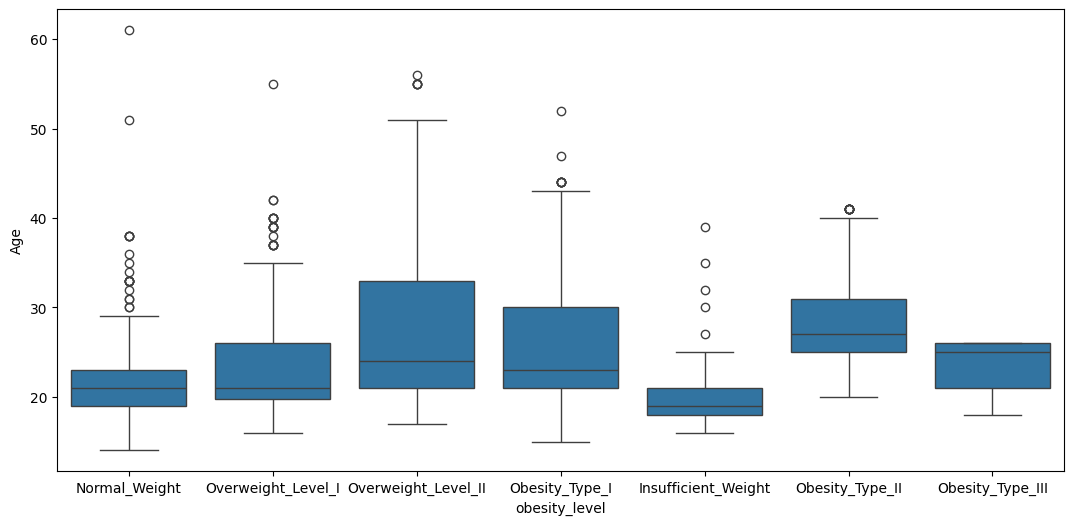

In [ ]:
plt.figure(figsize=(13, 6))
sns.boxplot(x='obesity_level', y='Age', data=df)
plt.show()

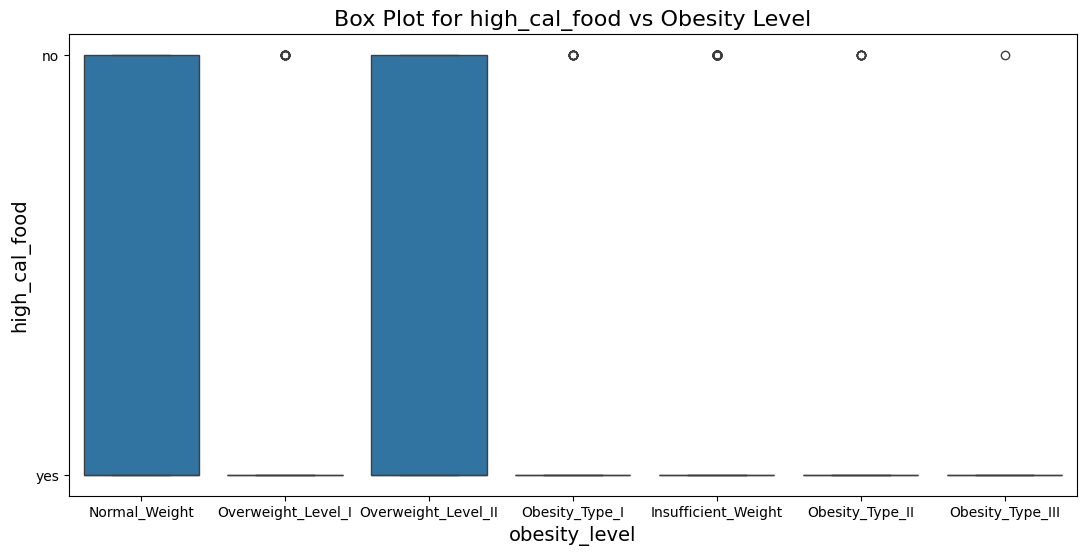

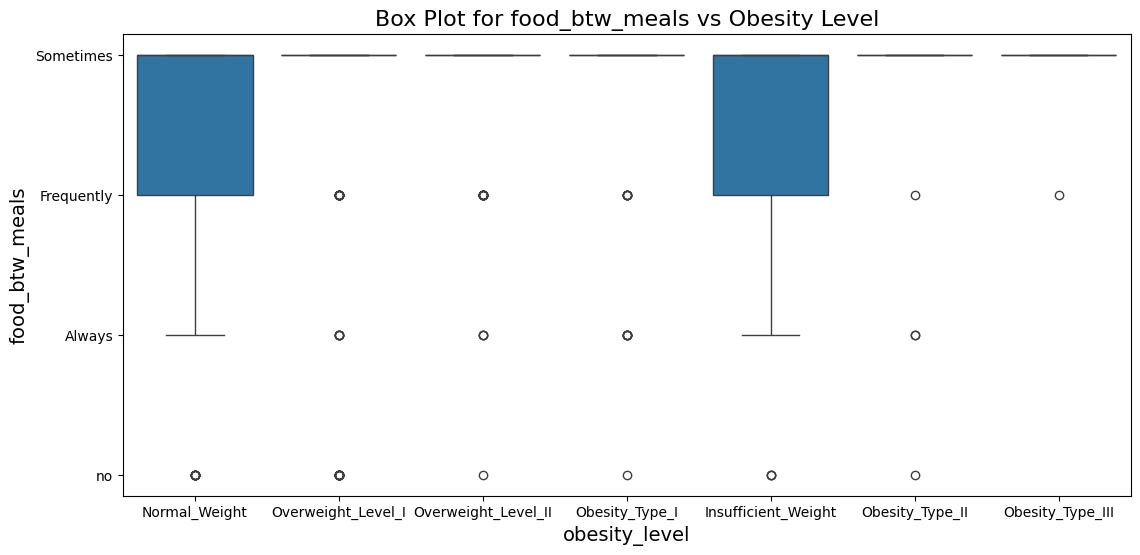

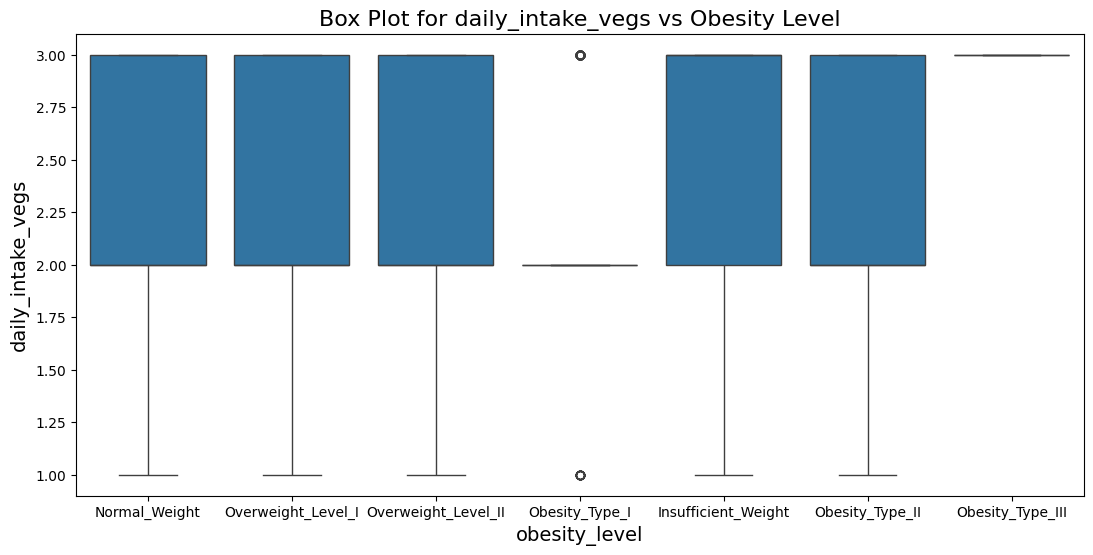

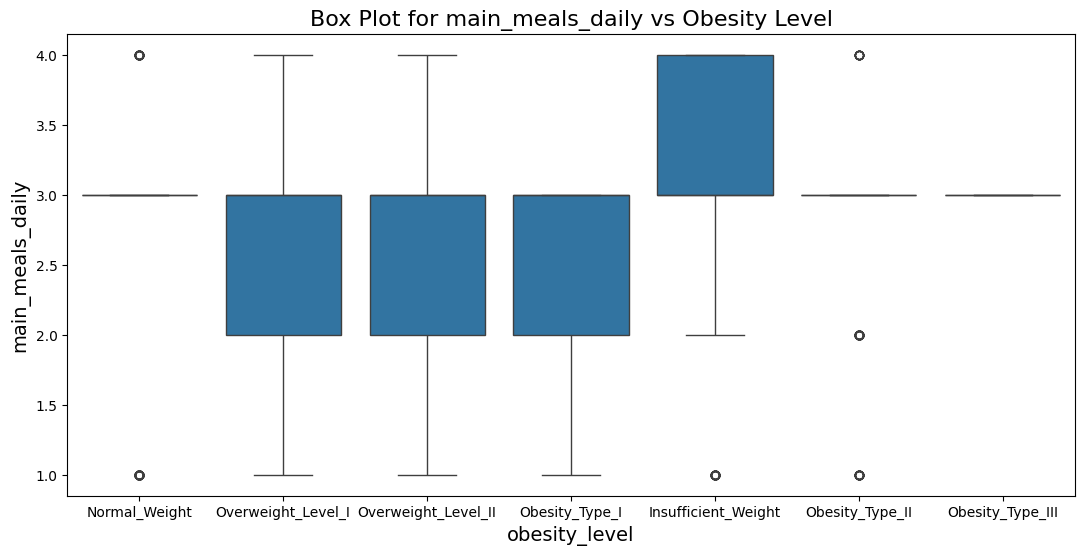

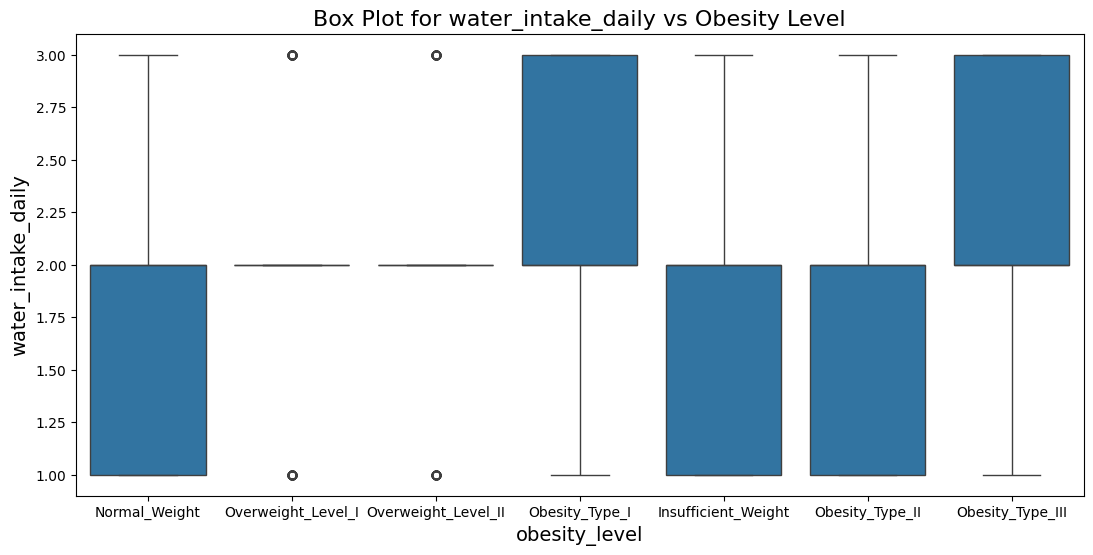

In [ ]:
food_columns = ['high_cal_food', 'food_btw_meals', 'daily_intake_vegs','main_meals_daily','water_intake_daily']

for column in food_columns:
    plt.figure(figsize=(13, 6))
    sns.boxplot(x='obesity_level', y=column, data=df)
    plt.title(f'Box Plot for {column} vs Obesity Level', fontsize=16)
    plt.xlabel('obesity_level', fontsize=14)
    plt.ylabel(column, fontsize=14)
    plt.show()

In [ ]:
df.groupby('obesity_level')['Age'].mean()

,Age
obesity_level,
Insufficient_Weight,19.755639
Normal_Weight,21.758865
Obesity_Type_I,25.903134
Obesity_Type_II,28.262626
Obesity_Type_III,23.503086
Overweight_Level_I,23.554348
Overweight_Level_II,26.979167


In [ ]:
df.groupby('obesity_level')['physical_activity_daily'].mean()

,physical_activity_daily
obesity_level,
Insufficient_Weight,1.274436
Normal_Weight,1.251773
Obesity_Type_I,0.974359
Obesity_Type_II,0.979798
Obesity_Type_III,0.635802
Overweight_Level_I,1.072464
Overweight_Level_II,0.958333


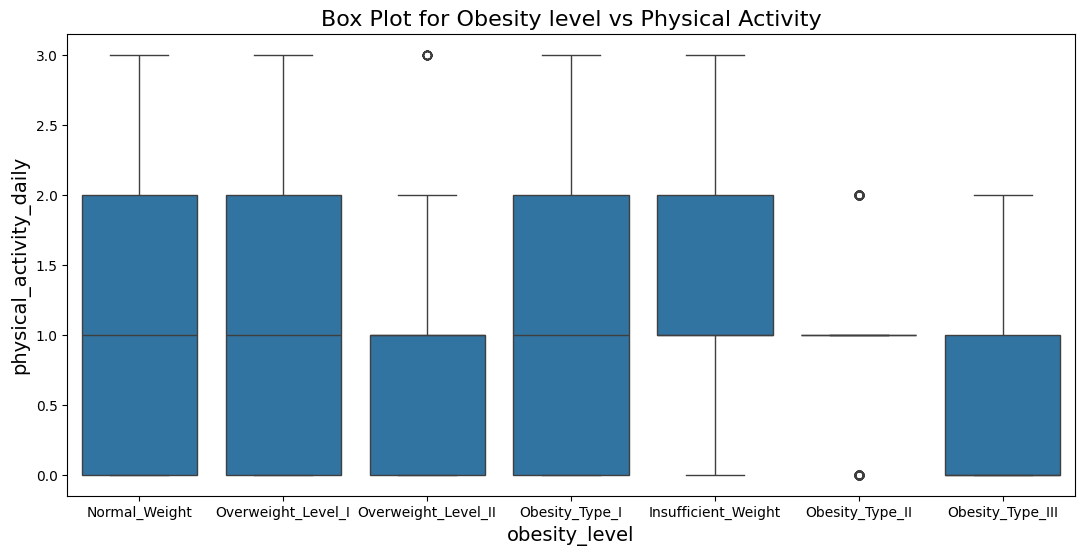

In [ ]:
plt.figure(figsize=(13, 6))
sns.boxplot(x='obesity_level', y='physical_activity_daily', data=df)
plt.title(f'Box Plot for Obesity level vs Physical Activity', fontsize=16)
plt.xlabel('obesity_level', fontsize=14)
plt.ylabel('physical_activity_daily', fontsize=14)
plt.show()

In [ ]:
df.groupby('obesity_level')['main_meals_daily'].mean()

,main_meals_daily
obesity_level,
Insufficient_Weight,2.954887
Normal_Weight,2.748227
Obesity_Type_I,2.415954
Obesity_Type_II,2.747475
Obesity_Type_III,3.000000
Overweight_Level_I,2.586957
Overweight_Level_II,2.506944


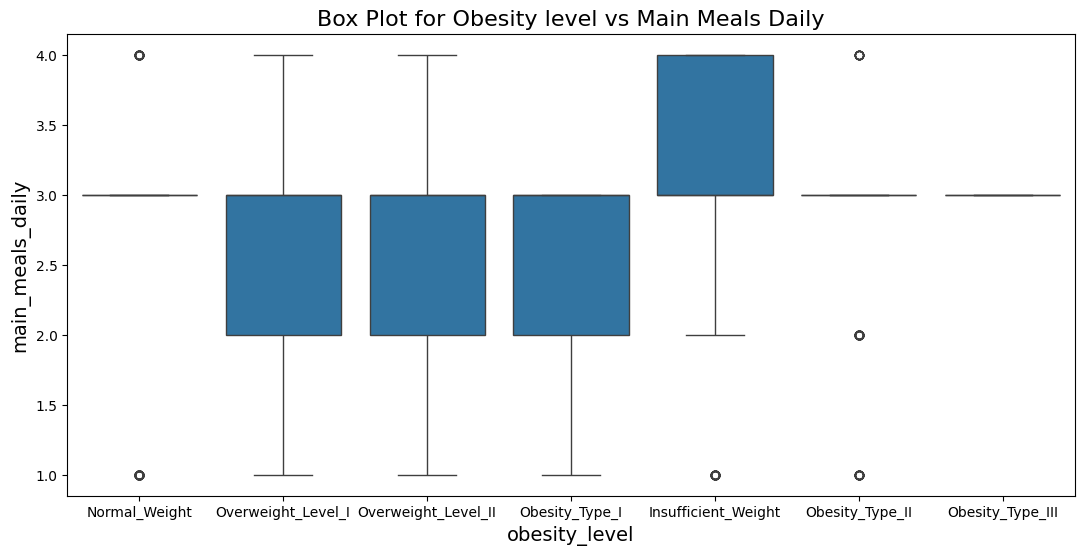

In [ ]:
plt.figure(figsize=(13, 6))
sns.boxplot(x='obesity_level', y='main_meals_daily', data=df)
plt.title(f'Box Plot for Obesity level vs Main Meals Daily', fontsize=16)
plt.xlabel('obesity_level', fontsize=14)
plt.ylabel('main_meals_daily', fontsize=14)
plt.show()

In [ ]:
df.groupby('obesity_level')['daily_intake_vegs'].mean()

,daily_intake_vegs
obesity_level,
Insufficient_Weight,2.515038
Normal_Weight,2.336879
Obesity_Type_I,2.173789
Obesity_Type_II,2.393939
Obesity_Type_III,3.000000
Overweight_Level_I,2.275362
Overweight_Level_II,2.274306


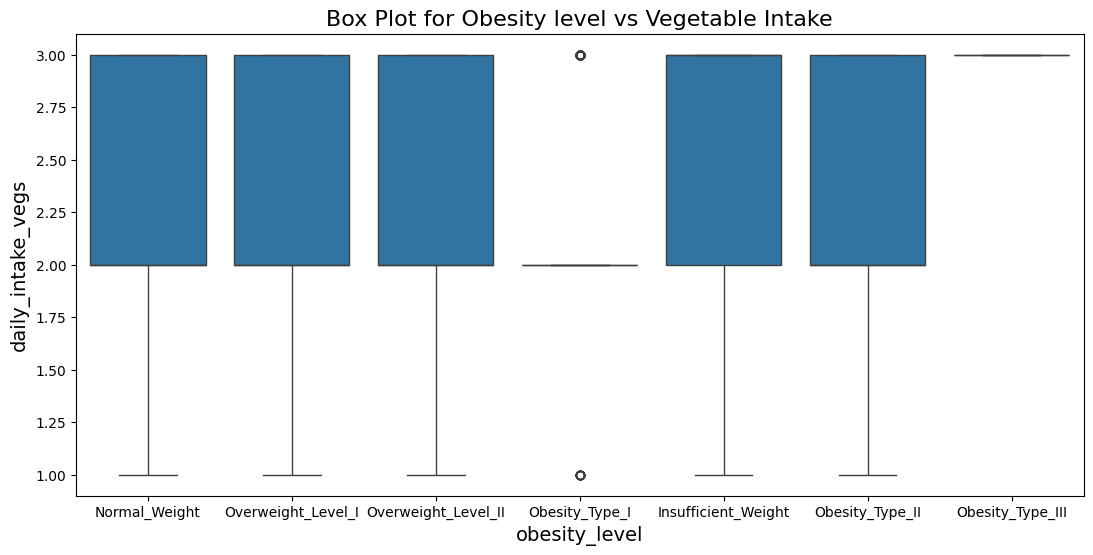

In [ ]:
plt.figure(figsize=(13, 6))
sns.boxplot(x='obesity_level', y='daily_intake_vegs', data=df)
plt.title(f'Box Plot for Obesity level vs Vegetable Intake', fontsize=16)
plt.xlabel('obesity_level', fontsize=14)
plt.ylabel('daily_intake_vegs', fontsize=14)
plt.show()

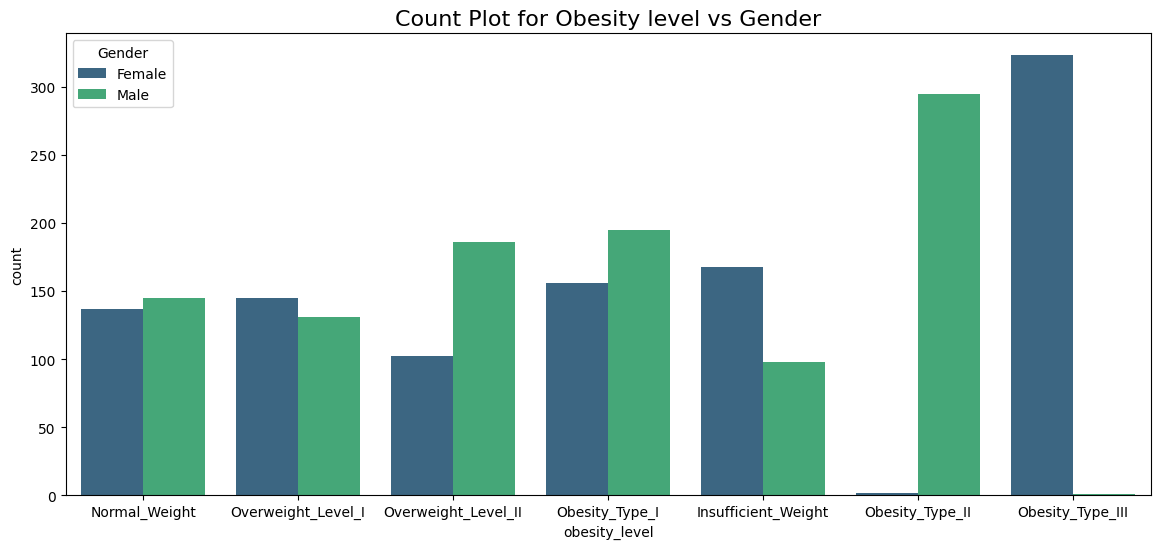

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='obesity_level', hue='Gender', palette='viridis')
plt.title(f'Count Plot for Obesity level vs Gender', fontsize=16)
plt.show()

**Step 3: Prepare Data for Training**

● Split the dataset into features (inputs) and target (output).

● Encode categorical data if necessary using appropriate techniques such as one-hot encoding.

● Normalize or scale the feature data to ensure effective training of the neural network.

● Divide the data into training and testing sets to evaluate the model's performance.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Apply the encoder to the categorical columns
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_columns]),
                            columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns and concatenate the encoded data
df = df.drop(columns=categorical_columns)
df = pd.concat([df, encoded_data], axis=1)

In [ ]:
df

,Age,Height,Weight,obesity_level,Gender_Male,family_history_with_overweight_yes,high_cal_food_yes,food_btw_meals_Frequently,food_btw_meals_Sometimes,food_btw_meals_no,...,main_meals_daily_2,main_meals_daily_3,main_meals_daily_4,water_intake_daily_2,water_intake_daily_3,physical_activity_daily_1,physical_activity_daily_2,physical_activity_daily_3,electronics_usage_1,electronics_usage_2
0,21.0,1.62,64.0,Normal_Weight,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,1.52,56.0,Normal_Weight,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,23.0,1.80,77.0,Normal_Weight,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,27.0,1.80,87.0,Overweight_Level_I,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,22.0,1.78,89.8,Overweight_Level_II,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
922,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
923,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1080,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y = df['obesity_level']
X = df.drop(columns=['obesity_level'])

In [ ]:
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

In [ ]:
y_encoded

array([1, 1, 1, ..., 7, 7, 7])

In [ ]:
categorical_columns

['Gender',
 'family_history_with_overweight',
 'high_cal_food',
 'food_btw_meals',
 'calories_monitor',
 'alcohol_consumption',
 'transportation_used',
 'SMOKE',
 'daily_intake_vegs',
 'main_meals_daily',
 'water_intake_daily',
 'physical_activity_daily',
 'electronics_usage']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
X_train.dtypes

,0
Age,float64
Height,float64
Weight,float64
Gender_Male,float64
family_history_with_overweight_yes,float64
high_cal_food_yes,float64
food_btw_meals_Frequently,float64
food_btw_meals_Sometimes,float64
food_btw_meals_no,float64
calories_monitor_yes,float64


In [ ]:
X_train.shape

(1688, 30)

In [ ]:
X_train.dtypes

,0
Age,float64
Height,float64
Weight,float64
Gender_Male,float64
family_history_with_overweight_yes,float64
high_cal_food_yes,float64
food_btw_meals_Frequently,float64
food_btw_meals_Sometimes,float64
food_btw_meals_no,float64
calories_monitor_yes,float64


In [ ]:
for col in numerical_columns:
    X_train[col] = X_train[col].fillna(X_train[col].mean())

**Step 4: Build the Neural Network Model**

● Define the architecture of the neural network using a sequential model.

● Add input, hidden, and output layers. Choose activation functions for each layer—commonly 'relu' for hidden layers and 'softmax' for the output layer if it's a classification problem.

● Configure the compilation of the model by selecting an optimizer, a loss function, and metrics to monitor (e.g., accuracy).

In [ ]:
!pip install keras

In [ ]:
model = Sequential()

model.add(Dense(64,input_dim = 30, activation = 'relu'))

model.add(Dense(36, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))

model.add(Dense(8, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           2,340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,688 (22.22 KB)

 Trainable params: 5,688 (22.22 KB)

 Non-trainable params: 0 (0.00 B)

**Step 5: Train the Neural Network**

● Train the model on the dataset using the training data. Set parameters such as the number of epochs and batch size.

● Monitor the training process to check for issues like overfitting or underfitting.

In [ ]:
model.fit(X_train, y_train, epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1366 - loss: nan
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1217 - loss: nan
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1240 - loss: nan
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1204 - loss: nan
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1220 - loss: nan
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1329 - loss: nan
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1284 - loss: nan
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1163 - loss: nan
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1295 - loss: nan
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1301 - loss: nan
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1221 - loss: nan
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1461 - loss: nan 
Epoch 13/100

**Step 6: Evaluate the Model**

● Use the test set to evaluate the model's performance.

● Analyze the accuracy and other metrics to determine how well the model predicts new data.

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Optionally, you can generate a classification report for more detailed evaluation
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels
print(classification_report(y_test, y_pred_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1424 - loss: nan  
Test Loss: nan
Test Accuracy: 0.1348
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.13      1.00      0.24        57
           1       0.00      0.00      0.00        64
           2       0.00      0.00      0.00        74
           3       0.00      0.00      0.00        58
           4       0.00      0.00      0.00        66
           5       0.00      0.00      0.00        49
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00         7

    accuracy                           0.13       423
   macro avg       0.02      0.12      0.03       423
weighted avg       0.02      0.13      0.03       423



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
